In [3]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [4]:
# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))
print(X_train.shape)

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
(60000, 28, 28)


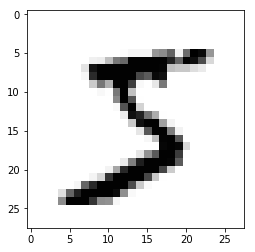

In [5]:
%matplotlib inline

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [7]:
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

print(X_train.shape)

(60000, 784)


In [8]:
# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

class : 5 


In [9]:
# 바이너리화 과정
Y_train = np_utils.to_categorical(

Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [15]:
from keras.models import Sequential
from keras.layers import Dense

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
import os

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [17]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 00001: val_loss improved from inf to 0.15815, saving model to ./model/01-0.1582.hdf5
Epoch 00002: val_loss improved from 0.15815 to 0.10143, saving model to ./model/02-0.1014.hdf5
Epoch 00003: val_loss improved from 0.10143 to 0.09352, saving model to ./model/03-0.0935.hdf5
Epoch 00004: val_loss improved from 0.09352 to 0.07705, saving model to ./model/04-0.0770.hdf5
Epoch 00005: val_loss improved from 0.07705 to 0.06940, saving model to ./model/05-0.0694.hdf5
Epoch 00006: val_loss improved from 0.06940 to 0.06496, saving model to ./model/06-0.0650.hdf5
Epoch 00007: val_loss improved from 0.06496 to 0.06414, saving model to ./model/07-0.0641.hdf5
Epoch 00008: val_loss improved from 0.06414 to 0.06312, saving model to ./model/08-0.0631.hdf5
Epoch 00009: val_loss improved from 0.06312 to 0.05960, saving model to ./model/09-0.0596.hdf5
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not impro

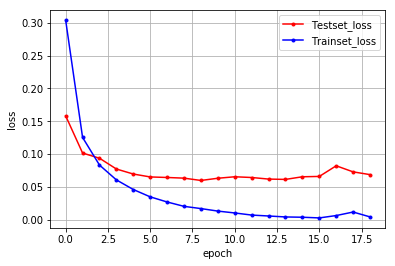

In [18]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()